About Dataset

Context
The dataset consists of lists of unique objects of popular portals for the sale of real estate in Russia. More than 540 thousand objects.
The dataset contains 540000 real estate objects in Russia.

Content
The Russian real estate market has a relatively short history. In the Soviet era, all properties were state-owned; people only had the right to use them with apartments allocated based on one's place of work. As a result, options for moving were fairly limited. However, after the fall of the Soviet Union, the Russian real estate market emerged and Muscovites could privatize and subsequently sell and buy properties for the first time. Today, Russian real estate is booming. It offers many exciting opportunities and high returns for lifestyle and investment.
The real estate market has been in a growth phase for several years, which means that you can still find properties at very attractive prices, but with good chances of increasing their value in the future.

Dataset
The dataset has 13 fields.
* date - date of publication of the announcement;
* time - the time when the ad was published;
* geo_lat - Latitude
* geo_lon - Longitude
* region - Region of Russia. There are 85 subjects in the country in total.
* building_type - Facade type. 0 - Other. 1 - Panel. 2 - Monolithic. 3 - Brick. 4 - Blocky. 5 - Wooden
* object_type - Apartment type. 1 - Secondary real estate market; 2 - New building;
* level - Apartment floor
* levels - Number of storeys
* rooms - the number of living rooms. If the value is "-1", then it means "studio apartment"
* area - the total area of the apartment
* kitchen_area - Kitchen area
* price - Price. in rubles


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.copy_on_write = True

In [2]:
raw_data = pd.read_csv('all_v2.csv')
data = raw_data.copy()
data

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,20:13:58,55.804736,37.750898,3,1,8,17,4,93.2,13.8,11
5477002,12503160,2021-05-01,20:14:01,55.841415,37.489624,3,2,17,32,2,45.9,6.6,11
5477003,8800000,2021-05-01,20:14:04,56.283909,44.075408,2871,2,4,17,3,86.5,11.8,1
5477004,11831910,2021-05-01,20:14:12,55.804736,37.750898,3,1,8,33,2,52.1,18.9,11


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


In [4]:
data.isnull().any()

price            False
date             False
time             False
geo_lat          False
geo_lon          False
region           False
building_type    False
level            False
levels           False
rooms            False
area             False
kitchen_area     False
object_type      False
dtype: bool

Vemos que no tiene valores nulos.

In [5]:
data.duplicated().sum()

1523

Como tiene valores duplicados, vamos a eliminarlos.

In [6]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5475483.000,5475483.000,5475483.000,5475483.000,5475483.000,5475483.000,5475483.000,5475483.000,5475483.000,5475483.000,5475483.000
mean,4421478.232,54.038,53.247,4307.440,1.949,6.214,11.397,1.726,53.918,10.628,3.944
std,21510157.547,4.623,20.748,3307.991,1.039,4.957,6.535,1.082,33.355,9.793,4.558
min,-2144967296.000,41.459,19.890,3.000,0.000,1.000,1.000,-2.000,0.070,0.010,1.000
25%,1950000.000,53.377,37.778,2661.000,1.000,2.000,5.000,1.000,38.000,7.000,1.000
50%,2990000.000,55.171,43.070,2922.000,2.000,5.000,10.000,2.000,48.020,9.700,1.000
75%,4800020.000,56.226,65.650,6171.000,3.000,9.000,16.000,2.000,63.130,12.700,11.000
max,2147483647.000,71.980,162.536,61888.000,5.000,39.000,39.000,10.000,7856.000,9999.000,11.000


A simple vista vemos algunos problemas:
1. Precios negativos y excesivamente caros
2. Las regiones son numeros que no corresponden a las de Russia.
3. Habitaciones con un valor de -2 (el valor -1 es para studio)
4. Areas minimas insignificantes y area máxima demasiado grande (pero puede ser si es una casa rural)
5. Cocina con tamaño minimo insignificante y extremadamente grande
6. El tipo de objecto que se refiere a nuevo o usado, tiene los valores 1 y 11.

## Plan de acción

1. DATE / TIME:
    * a- Borrar la columna time
    * b- La columna Date hay que separarla en Month y Year.
2. OBJECT TYPE
    * a- pasar los typos con valor 11 a 2.
3. LEVEL / LEVELS:
    * a- ver que el piso, no sea superior al total de pisos.
4. ROOMS:
    * a- revisar valores negativos, -1 es para studios.
    * b- corroborar que las dimensiones correspondan con la cantidad de habitaciones, sobre todo en los estudios.   
5. AREA / AREA KITCHEN
    * a- revisar que los tamaños sean logicos a la propiedades
    * b- ver la correlacción entre el tamaño y los precios
6. PRICE:
    * a- eliminar negativos, antes verificar si simplemente hay que pasarlos a positivo (absoluto)
    * b- comparar precios con el area, para detectar valores de precio erroneos
    * c- buscar precios de viviendas en Russia para conocer sus valores en rubros
7. BUILDING TYPE:
    * a- revisar los tipos de construcción con respecto a los precios, porque hay valores desproporcionados para construcciones de Wooden.    
-------------------------------------
8. GEOLOCALIZACIÓN Y REGION:
    * a- trazar un mapa con la geolocalicación a ver si se asemeja al mapa de Russia
    * b- ver si podemos transformar el nombre de las regiones con la geolocalizacion, deberemos buscar información u otro dataset que conentenga la información.
    
9. VALOR M2
    * a- Agregar una columna con el valor del m2.

-------------------------------------
Una vez terminado, realizamos EDA, pero seguiremos viendo que datos austar, porque seguramente queden Outliers y registros que no tengan coherencia.

## 2. DATE/TIME

In [8]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [9]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

In [10]:
data = data.drop(['date','time'], axis=1)

In [11]:
data.head(4)

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
0,6050000,59.806,30.376,2661,1,8,10,3,82.600,10.800,1,2018,2
1,8650000,55.684,37.297,81,3,5,24,2,69.100,12.000,1,2018,2
2,4000000,56.295,44.062,2871,1,5,9,3,66.000,10.000,1,2018,2
3,1850000,44.996,39.075,2843,4,12,16,2,38.000,5.000,11,2018,3


## 7. OBJECT TYPE

In [12]:
data['object_type'].unique()

array([ 1, 11], dtype=int64)

In [13]:
data['object_type'] = data['object_type'].map({1:1,11:2})
data.head(4)

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
0,6050000,59.806,30.376,2661,1,8,10,3,82.600,10.800,1,2018,2
1,8650000,55.684,37.297,81,3,5,24,2,69.100,12.000,1,2018,2
2,4000000,56.295,44.062,2871,1,5,9,3,66.000,10.000,1,2018,2
3,1850000,44.996,39.075,2843,4,12,16,2,38.000,5.000,2,2018,3


## 4. LEVEL / LEVELS

In [14]:
#data_levels = data[['level','levels']]

In [15]:
#
#for i in range(len(data_levels)):
#    if data_levels['level'].iloc[i] > data_levels['levels'].iloc[i]:
#        print(data_levels.iloc[i])

In [16]:
condition = data['level'] > data['levels']


In [17]:
data[condition]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
26283,1850000,56.057,92.713,3870,3,17,13,1,37.000,10.000,1,2018,9
35903,1100000,54.640,83.304,9654,3,4,1,1,30.000,8.000,1,2018,9
117969,700000,55.363,55.730,2722,3,2,1,2,40.000,11.000,1,2018,9
148751,3200000,62.035,129.747,11171,2,4,3,1,31.000,10.000,1,2018,9
164863,1050000,45.261,37.445,2843,4,2,1,2,54.000,10.000,1,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942329,4750000,44.873,37.332,2843,4,11,10,2,54.000,6.000,1,2021,1
5175158,6984180,55.980,37.133,81,3,4,3,2,57.800,11.680,2,2021,3
5175162,7164620,55.980,37.133,81,3,4,3,2,78.840,11.680,2,2021,3
5175971,4136487,55.980,37.133,81,3,4,3,1,48.400,9.010,2,2021,3


Tenemos 1072 casos, vamos a asigar los valores mayores de level a levels para cada uno de estos casos.

In [18]:
data['levels'] = np.where(condition,data['level'],data['levels'])
data[condition]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
26283,1850000,56.057,92.713,3870,3,17,17,1,37.000,10.000,1,2018,9
35903,1100000,54.640,83.304,9654,3,4,4,1,30.000,8.000,1,2018,9
117969,700000,55.363,55.730,2722,3,2,2,2,40.000,11.000,1,2018,9
148751,3200000,62.035,129.747,11171,2,4,4,1,31.000,10.000,1,2018,9
164863,1050000,45.261,37.445,2843,4,2,2,2,54.000,10.000,1,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942329,4750000,44.873,37.332,2843,4,11,11,2,54.000,6.000,1,2021,1
5175158,6984180,55.980,37.133,81,3,4,4,2,57.800,11.680,2,2021,3
5175162,7164620,55.980,37.133,81,3,4,4,2,78.840,11.680,2,2021,3
5175971,4136487,55.980,37.133,81,3,4,4,1,48.400,9.010,2,2021,3


In [19]:
data[data['level'] > data['levels']]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month


## 5. ROOMS

a- Revisar valores negativos, -1 es para studios.

In [20]:
data[data['rooms'] < -1]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
62764,24912000,45.158,38.984,2843,2,22,22,-2,415.200,40.000,2,2018,9
89002,25500000,59.926,30.413,2661,3,1,7,-2,360.000,22.000,1,2018,9
112359,3150000,59.979,30.513,2661,2,2,17,-2,35.000,9.000,1,2018,9
118076,4300000,55.916,36.861,81,3,3,5,-2,61.000,5.600,1,2018,9
142208,57000000,55.364,37.725,81,3,3,3,-2,300.000,30.000,1,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357663,2350000,56.115,47.195,3019,4,4,5,-2,9.000,10.700,1,2021,4
5374584,199000000,59.931,30.339,2661,3,2,3,-2,9.000,25.000,1,2021,4
5392668,36874000,59.935,30.272,2661,3,2,4,-2,9.000,19.700,1,2021,4
5432473,5200000,55.835,38.403,81,2,7,17,-2,9.000,10.700,1,2021,4


In [21]:
data[(data['rooms'] < -1) & (data['area'] < 40)]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
112359,3150000,59.979,30.513,2661,2,2,17,-2,35.000,9.000,1,2018,9
553493,5200000,55.733,37.831,3,1,6,12,-2,34.000,8.000,1,2018,11
1024371,4650000,55.910,37.714,81,2,12,22,-2,34.500,8.400,1,2019,1
1071652,7300000,43.590,39.721,2843,2,14,14,-2,36.000,5.000,2,2019,2
1165801,440000,52.556,103.874,5368,3,3,4,-2,12.000,2.000,1,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357663,2350000,56.115,47.195,3019,4,4,5,-2,9.000,10.700,1,2021,4
5374584,199000000,59.931,30.339,2661,3,2,3,-2,9.000,25.000,1,2021,4
5392668,36874000,59.935,30.272,2661,3,2,4,-2,9.000,19.700,1,2021,4
5432473,5200000,55.835,38.403,81,2,7,17,-2,9.000,10.700,1,2021,4


Todos los pisos menor a 40 metros cuadrados los vamos a catalogar como studios. Es exactamente la mitad de la cantidad total.

In [22]:
condition_studios = (data['rooms'] < -1) & (data['area'] < 40)
data['rooms'] = np.where(condition_studios,-1,data['rooms'])

In [23]:
data[(data['rooms'] < -1) & (data['area'] < 40)]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month


In [24]:
data[data['rooms'] < -1]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
62764,24912000,45.158,38.984,2843,2,22,22,-2,415.200,40.000,2,2018,9
89002,25500000,59.926,30.413,2661,3,1,7,-2,360.000,22.000,1,2018,9
118076,4300000,55.916,36.861,81,3,3,5,-2,61.000,5.600,1,2018,9
142208,57000000,55.364,37.725,81,3,3,3,-2,300.000,30.000,1,2018,9
145874,29500000,59.939,30.370,2661,3,5,7,-2,356.000,18.900,1,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344814,12000000,59.938,30.353,2661,3,4,5,-2,182.000,15.000,1,2020,2
3423777,110000000,55.737,37.595,3,3,3,3,-2,333.200,20.000,1,2020,3
3445747,244000000,55.678,37.393,81,2,2,4,-2,830.000,20.000,1,2020,3
3450875,7299999,54.745,20.534,7896,3,3,3,-2,159.000,8.000,1,2020,3


Vamos a revisar las medias con cada una de las habitaciones para intentar rescatar los valores que aún nos quedan en -2.

In [25]:
#data[data['rooms'] == 1]

for i in range(11):
    condition_rooms = data[data['rooms'] == i]
    print(f'\nLa media del area de {i} habitaciones es:', condition_rooms['area'].mean())
    #print(f'El minimo area de {i} habitaciones es:', condition_rooms['area'].min())
    #print(f'El máximo area de {i} habitaciones es:', condition_rooms['area'].max())


La media del area de 0 habitaciones es: nan

La media del area de 1 habitaciones es: 38.310614560043355

La media del area de 2 habitaciones es: 55.459555010902776

La media del area de 3 habitaciones es: 76.52123367058608

La media del area de 4 habitaciones es: 101.30610290492436

La media del area de 5 habitaciones es: 167.13300819490587

La media del area de 6 habitaciones es: 203.6279592702588

La media del area de 7 habitaciones es: 229.77563451776652

La media del area de 8 habitaciones es: 243.70963172804534

La media del area de 9 habitaciones es: 223.2251479289941

La media del area de 10 habitaciones es: 335.0


Acabamos de descubrir, sin querer, muchos errores en el campo AREA. mínimos y máximos que no coinciden, lo veremos proximamente.

In [26]:
#Creamos condiciones con un promedio de área para cada número de habitaciones

condition_1room = (data['rooms'] < -1) & (data['area'] >= 40) & (data['area'] < 60)
condition_2room = (data['rooms'] < -1) & (data['area'] >= 60) & (data['area'] < 80)
condition_3room = (data['rooms'] < -1) & (data['area'] >= 90) & (data['area'] < 120)
condition_4room = (data['rooms'] < -1) & (data['area'] >= 120) & (data['area'] < 200)
condition_5room = (data['rooms'] < -1) & (data['area'] >= 200) & (data['area'] < 2000)

In [27]:
data['rooms'] = np.where(condition_1room,1,data['rooms'])
data['rooms'] = np.where(condition_2room,2,data['rooms'])
data['rooms'] = np.where(condition_3room,3,data['rooms'])
data['rooms'] = np.where(condition_4room,4,data['rooms'])
data['rooms'] = np.where(condition_5room,5,data['rooms'])

In [28]:
data[data['rooms'] < -1]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month


b- corroborar que las dimensiones correspondan con la cantidad de habitaciones, sobre todo en los estudios.

In [29]:
#Vamos a revisar los studios

data[data['rooms'] == -1]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
32,2500000,43.635,39.727,2843,2,2,8,-1,25.000,5.000,1,2018,4
135,2991978,59.701,30.396,2661,1,1,5,-1,23.600,4.600,2,2018,7
289,4990050,55.674,37.746,3,2,8,15,-1,25.600,4.700,2,2018,9
1540,590000,53.380,83.706,6817,3,3,5,-1,14.000,4.000,1,2018,9
1560,670000,53.380,83.705,6817,3,3,5,-1,19.000,4.000,1,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476956,6230840,55.805,37.751,3,1,8,33,-1,19.600,5.000,2,2021,5
5476962,4339000,55.700,37.961,81,2,8,17,-1,25.000,8.000,1,2021,5
5476974,7504290,55.805,37.714,3,2,2,32,-1,19.900,5.800,2,2021,5
5476993,7136640,55.848,37.562,3,1,14,19,-1,25.200,6.500,2,2021,5


In [30]:
data[data['rooms'] == -1].describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
count,306281.000,306281.000,306281.000,306281.000,306281.000,306281.000,306281.000,306281.000,306281.000,306281.000,306281.000,306281.000,306281.000
mean,3421435.142,54.514,63.746,6190.884,1.632,6.463,12.910,-1.000,35.022,5.936,1.503,2019.484,6.112
std,34458908.096,3.792,22.310,3856.716,0.955,5.228,6.067,0.000,26.502,4.918,0.500,0.741,3.088
min,-1744967296.000,41.459,20.148,3.000,0.000,1.000,1.000,-1.000,0.220,0.010,1.000,2018.000,1.000
25%,1320000.000,54.945,38.132,2843.000,1.000,2.000,10.000,-1.000,25.000,4.000,1.000,2019.000,3.000
50%,1890000.000,55.020,82.893,9654.000,1.000,5.000,10.000,-1.000,32.470,5.000,2.000,2019.000,6.000
75%,3000000.000,55.718,83.001,9654.000,2.000,9.000,17.000,-1.000,39.020,6.120,2.000,2020.000,9.000
max,1773051000.000,69.495,136.998,14880.000,5.000,39.000,39.000,-1.000,6812.600,301.000,2.000,2021.000,12.000


In [31]:
data[data['rooms'] == -1].sort_values('area').head(316)

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
3284924,1150000,54.937,83.103,9654,2,7,17,-1,0.220,0.030,1,2020,2
3288143,830000,55.239,61.252,5282,5,3,3,-1,0.280,0.060,1,2020,2
2743100,500,44.690,37.790,2843,2,1,1,-1,1.000,1.000,2,2019,10
1857296,999000,55.878,49.020,2922,3,1,5,-1,1.200,1.000,1,2019,5
1961550,820000,57.112,65.592,3991,1,6,8,-1,1.300,1.000,1,2019,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609261,96000000,55.747,49.165,2922,3,3,3,-1,9.000,70.000,1,2020,4
3432489,3450000,55.775,37.597,3,3,1,6,-1,9.300,2.000,1,2020,3
3886438,3450000,55.775,37.597,3,3,1,6,-1,9.300,2.000,1,2020,6
4566986,400000,53.383,83.730,6817,3,5,5,-1,9.600,2.000,1,2020,10


Visto que hay tantas complicaciones con los datos de Rooms, Area y Kitchen Area, tome la decisión de borrar los registros para no tener que trabajar con más suposiciones.

In [32]:
# vamos a revisar por habitación
cond_room_studio = (data['rooms'] == -1) & (data['area'] > 60)
data[(data['rooms'] == -1) & (data['area'] > 60)].sort_values('area')

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
4627650,4990000,55.010,82.905,9654,0,2,26,-1,60.070,5.000,2,2020,10
4893382,4920000,55.017,82.963,9654,0,5,25,-1,60.080,10.860,2,2020,12
2532772,4686240,55.012,82.975,9654,0,7,25,-1,60.080,10.860,2,2019,9
2261392,4686240,55.017,82.963,9654,3,7,25,-1,60.080,10.860,2,2019,7
2672135,2950000,55.409,86.122,2860,1,3,10,-1,60.100,10.900,1,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112144,750000,45.105,39.003,2843,3,1,3,-1,2576.000,6.000,2,2020,7
2479260,1150000,54.949,82.944,9654,1,9,10,-1,3902.000,86.000,2,2019,8
5209099,2100000,59.883,30.454,2661,3,2,5,-1,4574.900,4.700,1,2021,3
2501262,234025676,55.925,37.844,81,3,16,16,-1,5000.000,100.000,2,2019,9


In [33]:
cond_room_1 = (data['rooms'] == 1) & (data['area'] > 50)
data[(data['rooms'] == 1) & (data['area'] > 50)].sort_values('area')

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
5250046,3454230,57.595,39.863,2604,2,19,25,1,50.010,17.250,2,2021,3
4370746,3243253,55.980,37.133,81,3,4,4,1,50.010,10.930,2,2020,9
4908866,3292720,57.596,39.868,2604,2,19,25,1,50.010,17.250,2,2020,12
4992363,3338520,57.595,39.863,2604,2,21,25,1,50.010,17.250,2,2021,2
3672714,2925585,57.596,39.868,2604,3,15,25,1,50.010,17.250,2,2020,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475415,250000,47.945,44.676,8509,2,2,2,1,5000.000,99.000,1,2019,8
3155470,85000,42.985,47.505,4007,4,1,1,1,5000.000,5.000,1,2020,1
2666639,650000,55.722,37.457,3,3,2,9,1,5200.000,1200.000,1,2019,9
5190077,7400000,59.956,30.254,2661,0,11,12,1,5352.300,10.000,1,2021,3


In [34]:
cond_room_2 = (data['rooms'] == 2) & (data['area'] > 100)
data[(data['rooms'] == 2) & (data['area'] > 100)].sort_values('area')

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
70379,29914950,59.849,30.386,2661,0,3,6,2,100.050,32.700,1,2018,9
757663,4800000,44.054,42.894,2900,3,3,6,2,100.100,18.000,2,2018,12
4564293,16478235,59.939,30.316,2661,2,10,12,2,100.100,22.400,2,2020,10
4670684,16658325,59.939,30.316,2661,2,10,12,2,100.100,22.400,2,2020,11
2695297,5850000,44.884,37.325,2843,2,7,9,2,100.100,19.400,1,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4442243,3198000,56.854,53.355,1010,3,5,8,2,5434.000,11.370,2,2020,9
1766037,1350000,53.688,88.067,2860,3,4,5,2,5644.000,4949.000,1,2019,5
3463169,3172050,56.132,47.153,3019,3,5,16,2,5985.000,13.300,2,2020,3
5342906,14685000,60.035,30.228,2661,0,2,12,2,7513.400,28.690,1,2021,4


In [35]:
cond_room_3 = (data['rooms'] == 3) & (data['area'] > 150)
data[(data['rooms'] == 3) & (data['area'] > 150)].sort_values('area')

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
4912203,10900000,55.086,82.961,9654,3,10,10,3,150.100,16.000,1,2021,1
290896,9200000,56.852,53.199,1010,2,9,9,3,150.100,12.700,2,2018,10
5202223,9990000,55.086,82.961,9654,3,10,10,3,150.100,16.000,1,2021,3
5170623,9990000,55.086,82.961,9654,3,10,10,3,150.100,16.000,1,2021,3
4549503,10900000,55.086,82.961,9654,3,10,10,3,150.100,16.000,1,2020,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345702,2500000,43.176,44.296,13919,3,2,2,3,5000.000,16.000,1,2020,2
1828236,3800000,62.047,129.740,11171,4,1,4,3,5220.000,4.000,1,2019,5
1845359,1900000,55.361,50.596,2922,1,9,9,3,6580.000,110.000,1,2019,5
3418858,200100,54.369,56.172,2722,3,2,2,3,7190.000,12.000,1,2020,3


In [36]:
cond_room_4 = (data['rooms'] == 4) & (data['area'] > 250)
data[(data['rooms'] == 4) & (data['area'] > 250)].sort_values('area')

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
4294756,5950000,60.724,28.736,3446,3,2,3,4,251.000,31.000,1,2020,8
4860281,315000000,55.741,37.578,3,2,6,7,4,251.000,30.000,1,2020,12
1100160,75000000,55.799,37.484,3,2,5,23,4,251.000,30.000,1,2019,2
1100216,75000000,55.799,37.484,3,3,5,22,4,251.300,47.000,1,2019,2
4694160,13400000,53.187,50.105,3106,3,5,6,4,252.000,12.000,1,2020,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939081,3600000,43.244,46.583,4007,1,3,5,4,4000.000,20.000,1,2020,6
3654178,2700000,45.383,38.218,2843,3,1,1,4,4207.000,10.000,1,2020,4
3453028,3200000,43.040,44.203,13919,3,1,4,4,5000.000,100.000,1,2020,3
4377810,240000000,45.054,39.008,2843,3,5,9,4,5000.000,99.000,1,2020,9


Vamos a borrar todos los valores excedentes para tener un dataset más preciso, es imposible corregir todos los datos correctamente.

In [37]:
data = data.drop(data[cond_room_studio].index)
data = data.drop(data[cond_room_1].index)
data = data.drop(data[cond_room_2].index)
data = data.drop(data[cond_room_3].index)
data = data.drop(data[cond_room_4].index)

C:\Users\claud\AppData\Local\Temp\ipykernel_19000\241572713.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data.drop(data[cond_room_1].index)
C:\Users\claud\AppData\Local\Temp\ipykernel_19000\241572713.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data.drop(data[cond_room_2].index)
C:\Users\claud\AppData\Local\Temp\ipykernel_19000\241572713.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data.drop(data[cond_room_3].index)
C:\Users\claud\AppData\Local\Temp\ipykernel_19000\241572713.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data.drop(data[cond_room_4].index)


In [38]:
data[(data['rooms'] == -1) & (data['area'] > 60)].sort_values('area')

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month


## 6. AREA / AREA KITCHEN
a- revisar que los tamaños sean logicos a la propiedades

b- ver la correlacción entre el tamaño y los precios

In [39]:
#Eliminar todas las propiedadas menor a 10m2.

#data_test = data.drop(data[data['area'] < 10].index) // esta es la forma que lo plantie al principio, pero es mejor:

data = data[data['area'] >= 10]

In [40]:
data[data['area'] < 10]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month


In [41]:
data.sort_values('area', ascending=False).head(100)

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
4342573,39999999,59.939,30.316,2661,1,1,5,6,5000.000,100.000,2,2020,9
3182733,1000000,43.404,45.382,2885,3,1,1,5,3000.000,13.000,1,2020,1
2621765,15600000,41.459,47.749,4007,3,3,3,5,2100.000,50.000,1,2019,9
1756576,500,55.569,38.228,81,5,24,24,5,2000.000,3000.000,2,2019,5
3720986,12700000,45.038,39.106,2843,3,17,19,5,1800.000,25.000,1,2020,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740199,488000000,55.738,37.613,3,2,11,15,6,640.000,30.000,1,2020,5
5244228,985773064,55.758,37.591,3,2,6,7,5,640.000,25.000,1,2021,3
2776525,630000000,55.758,37.591,3,2,6,7,6,640.000,70.000,1,2019,10
4476169,105000000,55.571,36.740,81,3,1,2,6,638.100,40.000,1,2020,9


In [42]:
data.sort_values('kitchen_area').head(5000)

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
1078098,1012500,54.935,82.845,9654,3,3,3,1,20.250,0.010,2,2019,2
1077850,1180000,54.935,82.845,9654,3,3,3,1,23.600,0.010,2,2019,2
1260509,1380000,54.935,82.845,9654,3,3,3,-1,27.600,0.010,2,2019,2
2315048,5350000,55.003,83.011,9654,3,3,10,3,73.400,0.010,1,2019,7
2489492,1990000,56.704,60.844,6171,4,2,3,2,41.000,0.010,2,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447279,1230000,55.030,83.016,9654,1,3,10,-1,33.580,1.000,2,2019,8
246712,650000,55.237,61.244,5282,2,1,3,-1,17.200,1.000,1,2018,10
2860469,2370000,57.094,65.590,3991,2,3,24,1,30.000,1.000,2,2019,11
3515975,1850000,55.098,82.941,9654,2,14,17,-1,24.000,1.000,1,2020,3


In [43]:
#Quitamos los registros con una cocina menor a 1m2.

data = data[data['kitchen_area'] >= 1]

In [44]:
data[data['kitchen_area'] < 1]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month


In [45]:
data[data['kitchen_area'] > 20]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
80,6800000,43.485,43.594,9648,4,4,9,3,97.000,30.000,1,2018,6
85,4300000,56.866,53.235,1010,3,7,17,3,85.000,28.700,2,2018,6
103,5500000,45.020,39.039,2843,4,6,12,3,84.000,23.000,1,2018,7
172,2700000,59.572,30.119,3446,3,3,5,2,45.000,31.000,1,2018,8
221,8771000,59.922,30.434,2661,2,7,16,4,95.000,24.000,2,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476979,23319120,55.854,37.621,3,2,2,11,3,96.360,23.210,2,2021,5
5476982,13403880,55.860,37.541,3,2,4,23,2,59.100,20.800,2,2021,5
5476983,11354820,55.620,37.417,3,1,13,15,2,58.200,20.700,2,2021,5
5476997,7200000,59.773,30.057,3446,2,2,3,2,59.000,22.300,2,2021,5


In [46]:
#Eliminamos las Kitchen mayores a 20 m2.
data = data[data['kitchen_area'] <= 20]

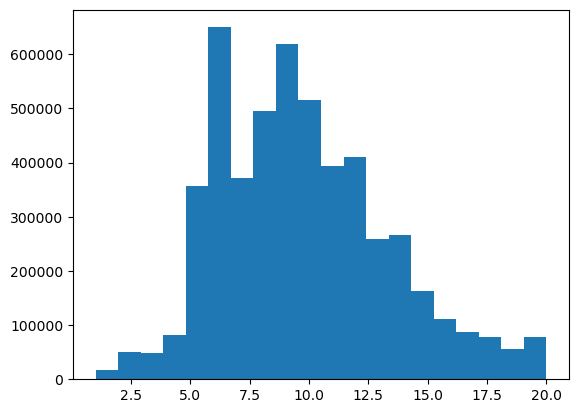

In [47]:
plt.hist(data['kitchen_area'], bins=20)
plt.show()

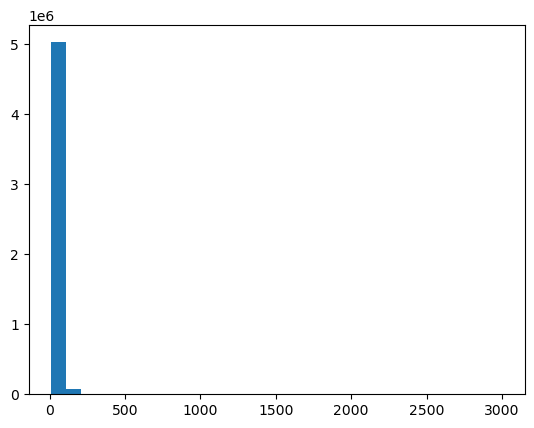

In [48]:
plt.hist(data['area'], bins=30)
plt.show()

In [49]:
#Eliminamos las propiedades menor a 501 m2
data = data[data['area'] <= 500]

In [50]:
data[data['area'] > 500]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month


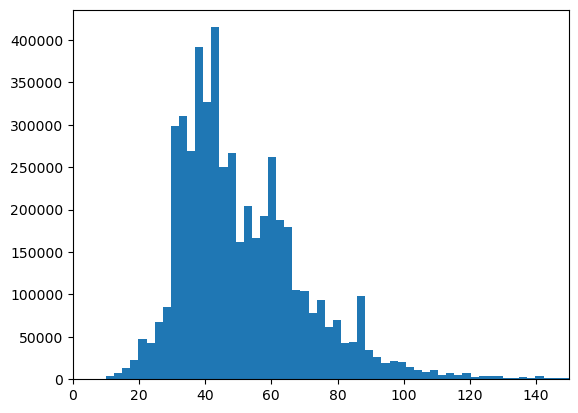

In [51]:
plt.hist(data['area'], bins=200)
plt.xlim(0,150)
plt.show()

In [52]:
data[data['area'] > 120]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
245,8499999,45.040,38.976,2843,2,8,24,3,122.000,20.000,1,2018,9
251,6300000,44.681,37.786,2843,2,5,6,3,136.000,10.000,1,2018,9
265,8300000,45.052,38.959,2843,2,5,12,3,128.000,12.000,1,2018,9
560,11000000,55.032,82.908,9654,3,2,8,3,125.800,11.300,1,2018,9
778,14900000,55.000,82.950,9654,0,2,16,5,323.000,13.000,1,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476606,25150000,60.010,29.716,2661,0,3,5,3,136.000,16.000,1,2021,5
5476662,24483040,59.844,30.122,2661,2,10,10,4,133.000,19.000,2,2021,5
5476811,9250000,56.839,60.606,6171,2,3,25,3,127.000,17.300,2,2021,5
5476828,33000000,59.921,30.346,2661,3,3,7,5,206.700,18.000,1,2021,5


Como podemos ver, las propiedades mayores a 120 m2 se desvanencen completamente, corresponden al 1% de la cantidad total de registros.

In [53]:
#Me olvide de revisar si hay Kitchen Area más grande que Area.
data[data['kitchen_area'] > data['area']]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
2964,650000,47.282,39.758,3230,1,8,9,5,17.200,20.000,1,2018,9
90913,1050000,56.883,60.507,6171,3,6,10,3,10.800,12.000,1,2018,9
220366,4850000,59.837,30.348,2661,1,1,9,1,10.000,17.000,1,2018,10
677492,990000,56.286,44.046,2871,3,5,9,1,18.000,20.000,1,2018,12
779208,1100000,47.223,39.719,3230,3,3,4,1,18.000,20.000,1,2018,12
779557,1100000,47.223,39.719,3230,3,3,4,1,18.000,20.000,1,2018,12
794650,550000,47.125,39.748,3230,3,2,2,3,12.000,15.000,1,2018,12
816855,630000,57.630,39.851,2604,3,2,5,1,13.000,20.000,1,2018,12
849379,400000,57.539,38.334,2604,3,5,5,1,18.900,20.000,1,2018,12
864802,710000,56.329,43.883,2871,3,2,4,1,16.000,20.000,1,2018,12


In [54]:
data = data.drop(data[data['kitchen_area'] > data['area']].index)

In [55]:
data[data['kitchen_area'] > data['area']]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month


## 6. PRICE

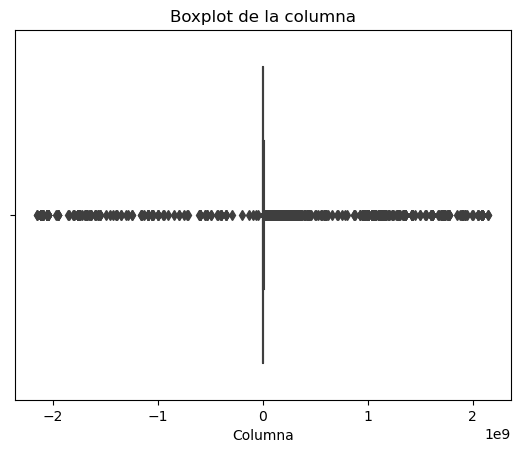

In [56]:
sns.boxplot(x=data['price'])
plt.title('Boxplot de la columna')
plt.xlabel('Columna')
plt.show()

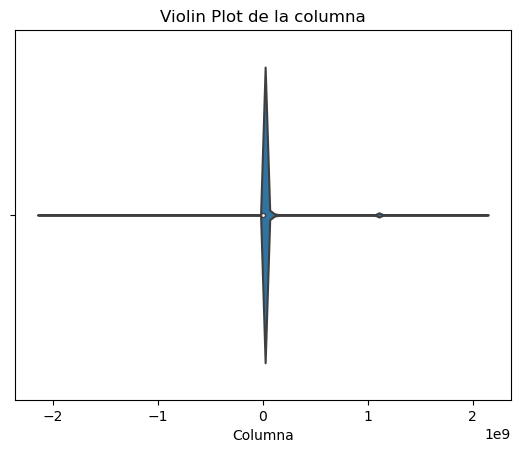

In [57]:
sns.violinplot(x=data['price'])
plt.title('Violin Plot de la columna')
plt.xlabel('Columna')
plt.show()

In [58]:
data[data['price'] < 100000]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
2321,800,56.844,62.716,6171,1,3,5,1,32.000,6.000,1,2018,9
7256,1000,57.106,65.723,3991,1,10,16,1,36.000,16.000,2,2018,9
8255,1750,44.902,37.888,2843,3,1,2,3,76.000,8.000,1,2018,9
9157,45000,55.744,37.874,3,1,4,17,2,53.000,8.000,1,2018,9
17726,80000,65.371,58.040,4417,3,1,2,1,26.000,6.000,1,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5450840,2000,58.229,68.272,3991,3,8,9,1,41.000,9.400,1,2021,4
5462134,3100,44.678,37.782,2843,1,2,9,1,32.500,12.000,1,2021,4
5473340,6700,60.030,30.411,2661,4,3,5,2,44.000,7.100,1,2021,5
5476102,6300,55.926,37.723,81,2,15,17,1,33.000,9.400,1,2021,5


Revisando valores inmobiliarios actuales, vemos que el valor minimo para un Studio publicado es de 110.000 rublos.
Por lo que eliminaremos los precios menores, ya que tan solo corresponden al 0.1% del total de registros.

In [59]:
data = data[data['price'] >= 100000]

In [60]:
data[data['price'] < 100000]

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month


In [61]:
data.sort_values('price')

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
4613111,100000,50.977,44.786,4695,3,2,2,1,36.000,9.000,1,2020,10
1706674,100000,67.502,64.037,4417,1,2,5,1,34.000,8.000,1,2019,4
1168388,100000,67.602,64.114,4417,1,3,5,1,35.000,9.000,1,2019,2
3113090,100000,45.033,38.975,2843,3,2,5,2,42.000,7.000,1,2020,1
4809816,100000,65.985,60.321,4417,3,3,5,3,56.800,10.000,1,2020,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439107,2083290000,54.948,82.971,9654,4,9,10,2,63.000,12.000,1,2019,3
1396657,2089477704,45.050,38.938,2843,2,5,25,3,95.860,15.000,2,2019,3
1053295,2089477704,45.060,38.941,2843,2,5,25,3,95.860,15.000,2,2019,2
3601118,2147483647,57.160,65.669,3991,0,9,10,1,44.200,18.120,2,2020,4


In [62]:
condition_price = (data['price'] > 1000000000) & (data['area'] < 300)

In [63]:
data = data.drop(data[condition_price].index)

In [64]:
data[condition_price]

C:\Users\claud\AppData\Local\Temp\ipykernel_19000\1133716525.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[condition_price]


,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month


In [65]:
data.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
count,5100158.000,5100158.000,5100158.000,5100158.000,5100158.000,5100158.000,5100158.000,5100158.000,5100158.000,5100158.000,5100158.000,5100158.000,5100158.000
mean,4003046.913,54.022,53.464,4329.451,1.947,6.117,11.227,1.712,51.667,9.722,1.284,2019.375,6.622
std,5625422.319,4.603,20.785,3306.136,1.042,4.874,6.438,1.063,20.623,3.700,0.451,0.870,3.541
min,100000.000,41.459,19.890,3.000,0.000,1.000,1.000,-1.000,10.000,1.000,1.000,2018.000,1.000
25%,1900000.000,53.366,37.832,2661.000,1.000,2.000,5.000,1.000,37.800,7.000,1.000,2019.000,3.000
50%,2898668.500,55.160,43.635,2922.000,2.000,5.000,10.000,2.000,46.800,9.000,1.000,2019.000,7.000
75%,4543838.000,56.149,73.298,6171.000,3.000,9.000,16.000,2.000,62.000,12.000,2.000,2020.000,10.000
max,1000000000.000,71.980,162.536,61888.000,5.000,39.000,39.000,10.000,500.000,20.000,2.000,2021.000,12.000


In [66]:
data.sort_values('price').tail(50)

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
4705165,605032704,53.741,91.420,2359,3,5,5,3,80.000,12.000,1,2020,11
3594006,620500000,55.760,37.592,3,2,5,9,4,194.500,20.000,1,2020,4
1970439,660374000,55.734,37.610,3,2,9,13,6,430.000,13.400,1,2019,6
5276349,705032704,44.636,41.935,2900,1,3,5,2,45.600,5.700,1,2021,4
3886056,721175000,55.741,37.623,3,2,9,9,4,227.500,12.000,1,2020,6
3054863,750000000,45.066,39.014,2843,1,7,16,3,150.000,20.000,1,2019,12
2914521,787500000,55.737,37.611,3,2,2,5,9,402.000,20.000,1,2019,11
5051062,805032704,55.736,49.206,2922,3,4,14,1,48.200,9.000,1,2021,2
436456,870000000,57.144,65.456,3991,0,15,16,1,19.000,17.000,2,2018,11
3791015,872200000,55.741,37.623,3,2,7,7,5,312.000,15.000,1,2020,5


In [67]:
#Vamos a transformar los precios a Euros, para tener un mejor endendimiento de los valores, además de ser más pequeños.
#Valor del Euro actual 29-01-24 = 97 Rublos.
data_rub = data.copy()
data_rub['price'] = data_rub['price'] / 97
data_rub.head(5)

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
0,62371.134,59.806,30.376,2661,1,8,10,3,82.600,10.800,1,2018,2
1,89175.258,55.684,37.297,81,3,5,24,2,69.100,12.000,1,2018,2
2,41237.113,56.295,44.062,2871,1,5,9,3,66.000,10.000,1,2018,2
3,19072.165,44.996,39.075,2843,4,12,16,2,38.000,5.000,2,2018,3
4,56185.567,55.919,37.985,81,3,13,14,2,60.000,10.000,1,2018,3


In [68]:
data_rub.sort_values('price')

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
4622618,1030.928,52.980,84.663,6817,3,1,2,2,32.000,8.000,1,2020,10
3285174,1030.928,53.897,54.612,2722,3,2,2,1,28.000,6.000,1,2020,2
2473331,1030.928,67.602,64.128,4417,1,1,5,3,69.300,8.000,1,2019,8
3386072,1030.928,57.135,61.071,6171,3,2,3,1,37.000,12.000,1,2020,3
3739749,1030.928,66.040,60.123,4417,3,5,5,1,30.500,6.000,1,2020,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
728873,10042268.041,54.947,82.959,9654,1,6,10,1,32.470,5.000,1,2018,12
2356871,10139416.124,43.538,41.784,11991,4,4,4,2,47.000,10.000,1,2019,8
1145027,10309278.340,55.034,82.902,9654,0,3,5,2,50.000,10.000,1,2019,2
1237116,10309278.340,55.055,82.916,9654,1,7,9,4,72.000,7.000,1,2019,2


In [69]:
data_rub[(data['price'] > 3000000) & (data['area'] < 100)]  

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
0,62371.134,59.806,30.376,2661,1,8,10,3,82.600,10.800,1,2018,2
1,89175.258,55.684,37.297,81,3,5,24,2,69.100,12.000,1,2018,2
2,41237.113,56.295,44.062,2871,1,5,9,3,66.000,10.000,1,2018,2
4,56185.567,55.919,37.985,81,3,13,14,2,60.000,10.000,1,2018,3
5,34020.619,55.908,37.726,81,1,4,5,1,32.000,6.000,1,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476999,132474.227,55.701,37.643,3,2,12,24,1,41.000,9.000,1,2021,5
5477001,203502.680,55.805,37.751,3,1,8,17,4,93.200,13.800,2,2021,5
5477002,128898.557,55.841,37.490,3,2,17,32,2,45.900,6.600,2,2021,5
5477003,90721.649,56.284,44.075,2871,2,4,17,3,86.500,11.800,1,2021,5


Revisando el mercado inmobiliario, detecto que en lineas generales los pisos de 100 m2 tienen un tope de 300.000.000 Rublos (3MM Euros), por lo que realizo el corte, suprimiendo 2.3MM de registros, de los cuales seguramente la mayoría sean erroneos.

In [70]:
condition_area = (data['price'] > 3000000) & (data['area'] < 100)
data_rub = data_rub.drop(data_rub[condition_area].index)

In [71]:
data_rub

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
3,19072.165,44.996,39.075,2843,4,12,16,2,38.000,5.000,2,2018,3
9,28865.979,55.737,38.846,81,1,9,10,2,55.000,8.000,1,2018,3
17,29690.722,55.735,52.366,2922,1,8,10,2,51.000,8.000,1,2018,3
18,14948.454,45.070,41.935,2900,1,9,10,1,43.000,9.000,1,2018,3
19,17010.309,44.994,41.123,2843,3,5,5,2,51.000,7.000,1,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476989,23711.340,53.225,50.246,3106,3,2,2,2,50.000,7.500,1,2021,5
5476991,26804.124,45.025,39.072,2843,4,1,2,3,63.000,8.000,1,2021,5
5476992,17525.773,55.137,61.426,5282,3,1,3,2,48.000,9.000,1,2021,5
5476995,6701.031,54.852,46.598,3019,3,2,2,1,42.000,13.000,1,2021,5


In [72]:
data_rub.sort_values('price')

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
3021181,1030.928,45.088,39.004,2843,3,1,5,2,28.000,2.000,1,2019,12
3853077,1030.928,45.429,46.851,8509,3,1,2,2,50.000,13.000,1,2020,6
429544,1030.928,67.581,63.792,4417,1,1,5,3,58.300,13.700,1,2018,11
2473331,1030.928,67.602,64.128,4417,1,1,5,3,69.300,8.000,1,2019,8
2538746,1030.928,52.163,109.777,9579,5,1,1,1,37.000,4.000,1,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970439,6807979.381,55.734,37.610,3,2,9,13,6,430.000,13.400,1,2019,6
3886056,7434793.814,55.741,37.623,3,2,9,9,4,227.500,12.000,1,2020,6
3054863,7731958.763,45.066,39.014,2843,1,7,16,3,150.000,20.000,1,2019,12
2914521,8118556.701,55.737,37.611,3,2,2,5,9,402.000,20.000,1,2019,11


In [73]:
price100k = data_rub[data_rub['price'] > 100000]
price500k = data_rub[data_rub['price'] > 500000]

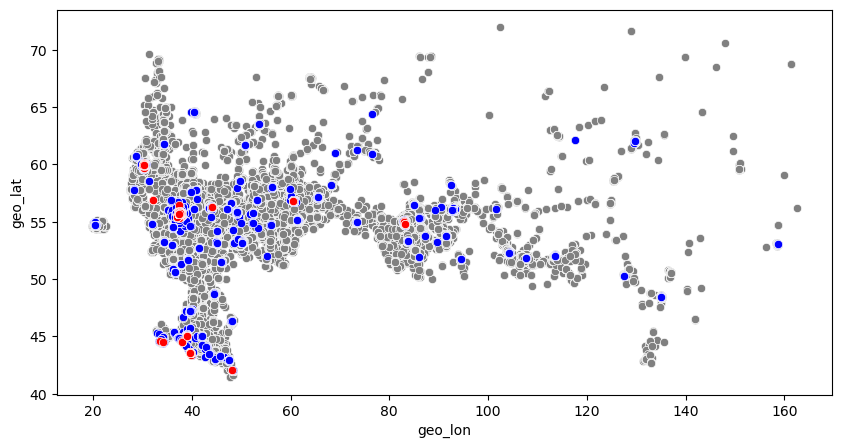

In [74]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=data_rub['geo_lon'], y=data_rub['geo_lat'], c='grey')
sns.scatterplot(x=price100k['geo_lon'], y=price100k['geo_lat'], c='blue')
sns.scatterplot(x=price500k['geo_lon'], y=price500k['geo_lat'], c='red')
plt.show()

Una breve muestra de como se muestran las ofertas en un gráfico de puntos, parece el mapa de Russia, y las propiedades de valor elevado parecen tener logica.

## BUILDING TYPE

In [75]:
data_rub[data_rub['building_type'] == 5].sort_values('price')

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
4704668,1030.928,62.081,32.358,8090,5,1,1,2,49.000,8.000,1,2020,11
5061051,1030.928,50.987,81.470,6817,5,1,1,2,50.000,5.000,1,2021,2
4126855,1030.928,56.344,46.567,4982,5,2,2,2,89.100,6.000,1,2020,7
3131509,1030.928,56.870,60.596,6171,5,1,1,-1,10.000,2.000,1,2020,1
3726571,1030.928,55.760,37.611,3,5,1,1,2,60.000,20.000,1,2020,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030875,1835051.546,55.804,37.504,3,5,1,1,5,109.000,14.000,1,2020,7
4108418,1835051.546,55.804,37.504,3,5,1,1,5,109.000,14.000,1,2020,7
3967870,1835051.546,55.804,37.504,3,5,1,1,5,109.000,14.000,1,2020,6
4111912,1835051.546,55.804,37.504,3,5,1,1,5,109.000,14.000,1,2020,7


El valor máximo públicado para una vivienda construida en madera es de 35.000.000 Rublos, lo que equivale a 350.000 euros.

In [76]:
data_rub[(data_rub['building_type'] == 5) & (data_rub['price'] > 300000)].sort_values('price')

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,month
4014378,303608.247,59.902,30.321,2661,5,18,19,4,197.900,12.000,1,2020,7
5102447,309278.351,59.958,30.296,2661,5,3,5,5,196.100,13.900,1,2021,3
4304152,309278.351,59.958,30.296,2661,5,3,5,5,196.100,13.900,1,2020,9
2228088,371134.021,55.698,37.498,3,5,8,25,3,100.200,13.500,1,2019,7
1393035,381443.299,55.679,37.470,3,5,3,21,3,103.000,11.000,1,2019,3
4806894,401030.928,55.682,37.493,3,5,2,9,4,129.100,15.800,1,2020,12
1812923,669072.165,55.741,37.630,3,5,7,8,5,144.600,14.000,1,2019,5
4762570,1494845.361,55.804,37.504,3,5,1,1,5,109.000,14.000,1,2020,11
4742753,1494845.361,55.804,37.504,3,5,1,1,5,109.000,14.000,1,2020,11
4656223,1494845.361,55.804,37.504,3,5,1,1,5,109.000,14.000,1,2020,11


Vamos a eliminar todos estos registros, ya que la gran mayoria no coinciden.

In [77]:
condition_wood = (data_rub['building_type'] == 5) & (data_rub['price'] > 300000)
data_rub = data_rub.drop(data_rub[condition_wood].index)

## 8. GEOLOCALIZACIÓN y REGION